In [19]:
import numpy as np
import pandas as pd
from numpy import random
from numpy.linalg import inv
import os
import scipy
from scipy import stats
from scipy.stats import skew,kurtosis,binom,norm
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

import statsmodels
from statsmodels import stats
from statsmodels.stats import weightstats as ssw
from statsmodels.stats import power as ss
from scipy.stats import t

import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp

In [20]:
df = pd.read_csv('used_cars_data.csv')
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [21]:
# find the number of missig values-
df.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

In [22]:
# Percentage of missing values
(df.isnull().sum() / len(df)) * 100


S.No.                 0.000000
Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.027575
Engine                0.634220
Power                 0.634220
Seats                 0.730732
New_Price            86.129877
Price                17.013650
dtype: float64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [24]:
df['Mileage'] = df['Mileage'].str.replace(' kmpl| km/kg', '', regex=True).astype(float)
df['Engine'] = df['Engine'].str.replace(' CC', '', regex=True).astype(float)
df['Power'] = df['Power'].str.replace(' bhp', '', regex=True)
df['Power'] = pd.to_numeric(df['Power'], errors='coerce')

In [25]:
def convert_price(x):
    if isinstance(x, str):
        x = x.strip().title()
        if 'Lakh' in x:
            return float(x.replace(' Lakh', '')) * 1e5
        elif 'Cr' in x:
            return float(x.replace(' Cr', '')) * 1e7
    return np.nan

df['New_Price'] = df['New_Price'].apply(convert_price)

In [26]:
# Replace values with the mean
df['Mileage'] = df['Mileage'].fillna(df['Mileage'].mean())
df['Engine'] = df['Engine'].fillna(df['Engine'].mean())
df['Power'] = df['Power'].fillna(df['Power'].mean())
df['Price'] = df['Price'].fillna(df['Price'].mean())
df['Seats'] = df['Seats'].fillna(df['Seats'].mean())
df['New_Price'] = df['New_Price'].fillna(df['New_Price'].mean())

In [27]:
df.isnull().sum()


S.No.                0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
dtype: int64

#Removed all the null values.

In [28]:
df.duplicated().sum()

np.int64(0)

#As there are no duplicat values. Can proceed further


- 1. Generate summary statistics (mean, median, std. dev., etc.) for numeric features like
Price, Mileage, Power, Engine, Kilometers_Driven.

In [29]:
numeric_cols = ['Price', 'Mileage', 'Power', 'Engine', 'Kilometers_Driven']

#summary statistics
summary_stats = df[numeric_cols].describe().T
summary_stats
# median values
summary_stats['median'] = df[numeric_cols].median()
summary_stats['mode'] = df[['Price', 'Mileage', 'Power', 'Engine', 'Kilometers_Driven']].mode().iloc[0]

In [30]:
summary_stats

,count,mean,std,min,25%,50%,75%,max,median,mode
Price,7253.0,9.479468,10.191695,0.44,3.85,6.75,9.479468,160.00,6.75,9.479468
Mileage,7253.0,18.141580,4.561567,0.00,15.17,18.16,21.100000,33.54,18.16,17.000000
Power,7253.0,112.765214,52.844178,34.20,77.00,98.60,138.030000,616.00,98.60,74.000000
Engine,7253.0,1616.573470,593.394164,72.00,1198.00,1493.00,1968.000000,5998.00,1493.00,1197.000000
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.00,53416.00,73000.000000,6500000.00,53416.00,60000.000000


#2. Analyze the distribution of categorical features like Fuel_Type, Transmission,
Owner_Type, and Location.

In [31]:
categorical_cols = ['Fuel_Type', 'Transmission', 'Owner_Type', 'Location']
for feature in categorical_cols:
    print(f"\n{feature} distribution:")
    print(df[feature].value_counts())
# Distribution of categorical features


Fuel_Type distribution:
Fuel_Type
Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: count, dtype: int64

Transmission distribution:
Transmission
Manual       5204
Automatic    2049
Name: count, dtype: int64

Owner_Type distribution:
Owner_Type
First             5952
Second            1152
Third              137
Fourth & Above      12
Name: count, dtype: int64

Location distribution:
Location
Mumbai        949
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: count, dtype: int64


#Create histograms and boxplots for numerical features like Price, Engine, and Mileage.

#Boxplots

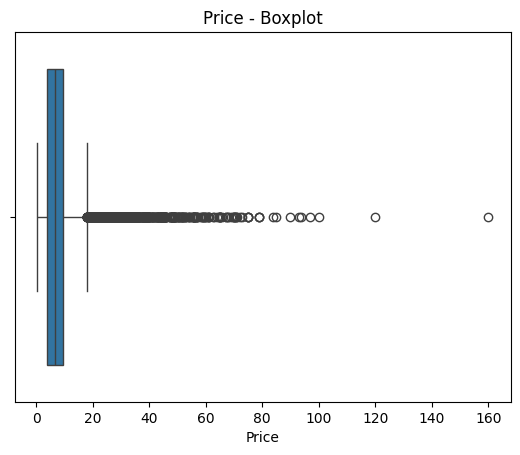

In [32]:

sns.boxplot(x=df['Price'])
plt.title('Price - Boxplot')
plt.xlabel('Price')
plt.show()

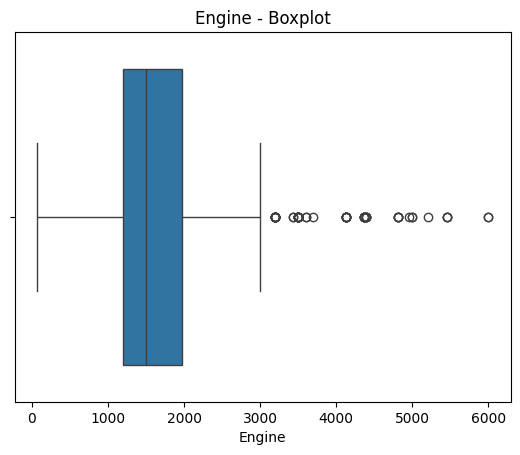

In [33]:

sns.boxplot(x=df['Engine'])
plt.title('Engine - Boxplot')
plt.xlabel('Engine')
plt.show()

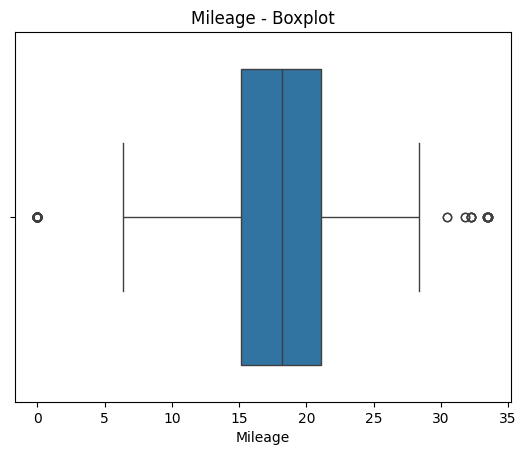

In [34]:

sns.boxplot(x=df['Mileage'])
plt.title('Mileage - Boxplot')
plt.xlabel('Mileage')
plt.show()

#Histograms

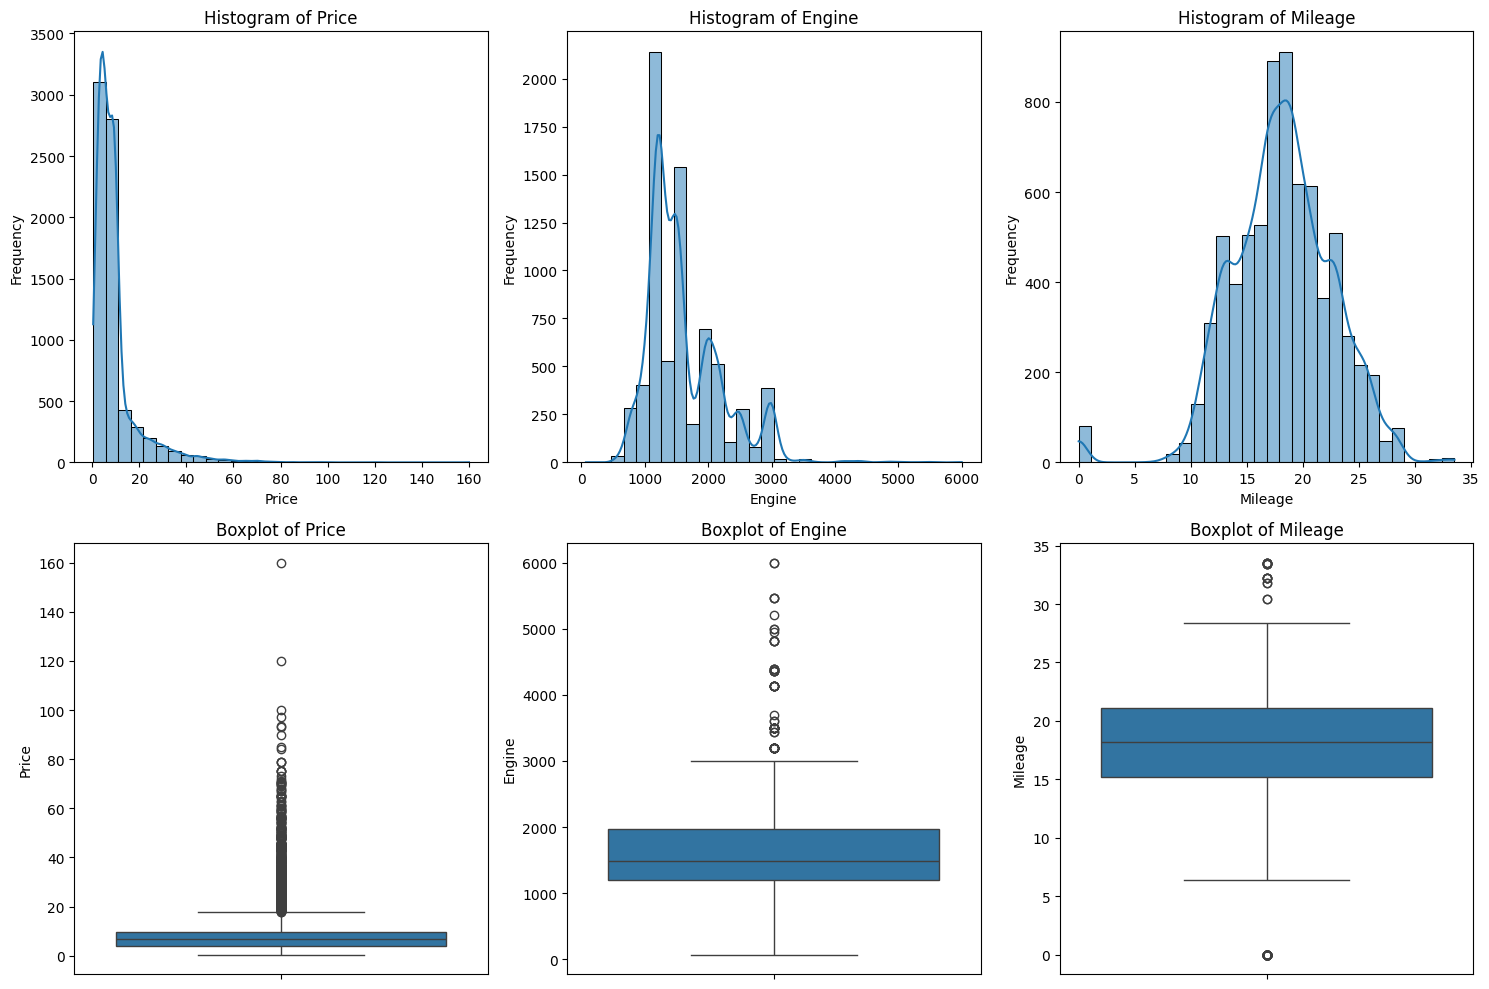

In [35]:
columns_to_plot = ['Price', 'Engine', 'Mileage']
plt.figure(figsize=(15, 10))
for i, col in enumerate(columns_to_plot):
  plt.subplot(2, 3, i + 1)
  sns.histplot(df[col].dropna(), kde=True, bins=30)
  plt.title(f'Histogram of {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')

   # Boxplot
  plt.subplot(2, 3, i + 4)
  sns.boxplot(y=df[col].dropna())
  plt.title(f'Boxplot of {col}')
  plt.ylabel(col)
plt.tight_layout()
plt.show()

In [36]:
df

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,2.277969e+06,1.750000
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,2.277969e+06,12.500000
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.610000e+05,4.500000
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,2.277969e+06,6.000000
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,2.277969e+06,17.740000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.60,5.0,2.277969e+06,9.479468
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.60,5.0,2.277969e+06,9.479468
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.10,5.0,2.277969e+06,9.479468
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.60,5.0,2.277969e+06,9.479468


C:\Users\lokes\AppData\Local\Temp\ipykernel_11628\2014488954.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis', order=df[col].value_counts().index)
C:\Users\lokes\AppData\Local\Temp\ipykernel_11628\2014488954.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis', order=df[col].value_counts().index)
C:\Users\lokes\AppData\Local\Temp\ipykernel_11628\2014488954.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis', order=df[col].value_count

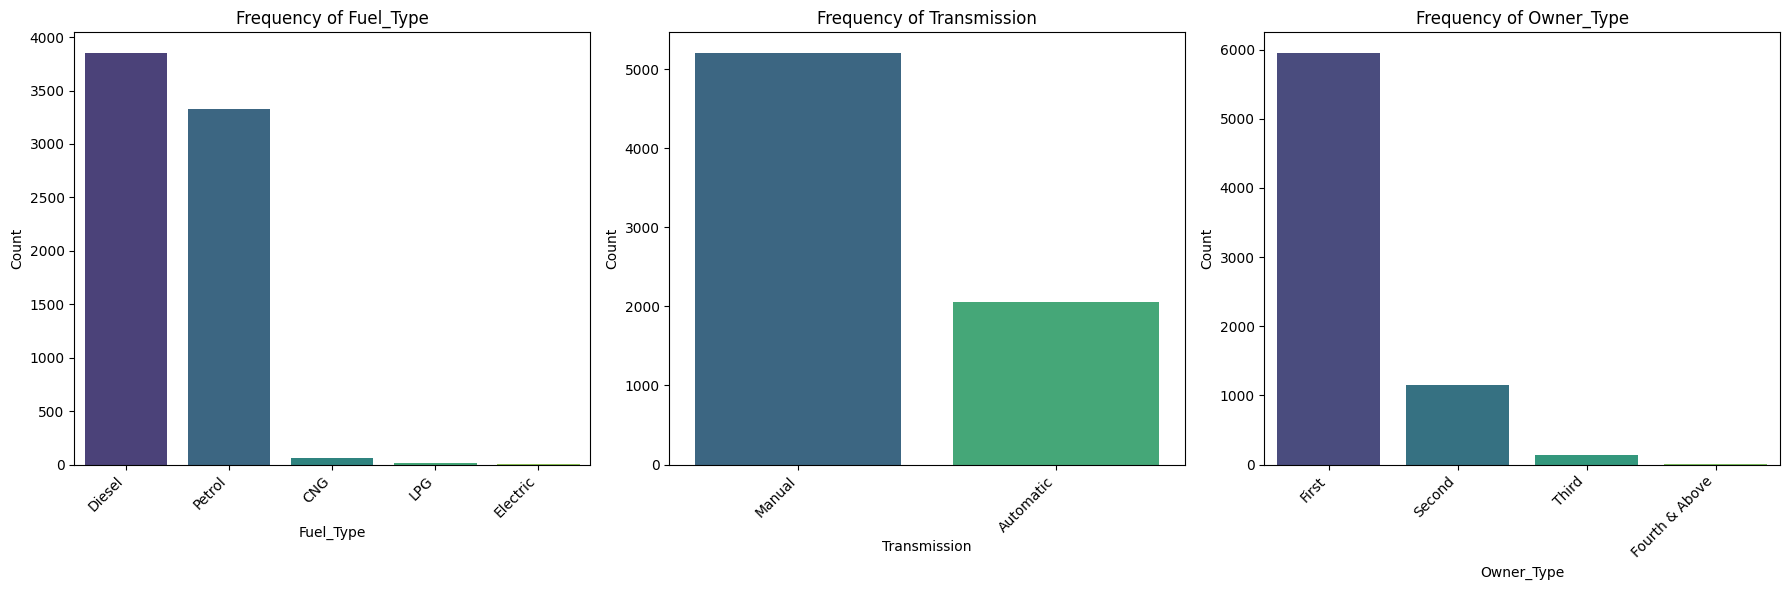

In [37]:
columns_to_plot = ['Fuel_Type', 'Transmission', 'Owner_Type']
plt.figure(figsize=(18, 6))
for i, col in enumerate(columns_to_plot):
    plt.subplot(1, 3, i + 1)
    sns.countplot(data=df, x=col, palette='viridis', order=df[col].value_counts().index)
    plt.title(f'Frequency of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

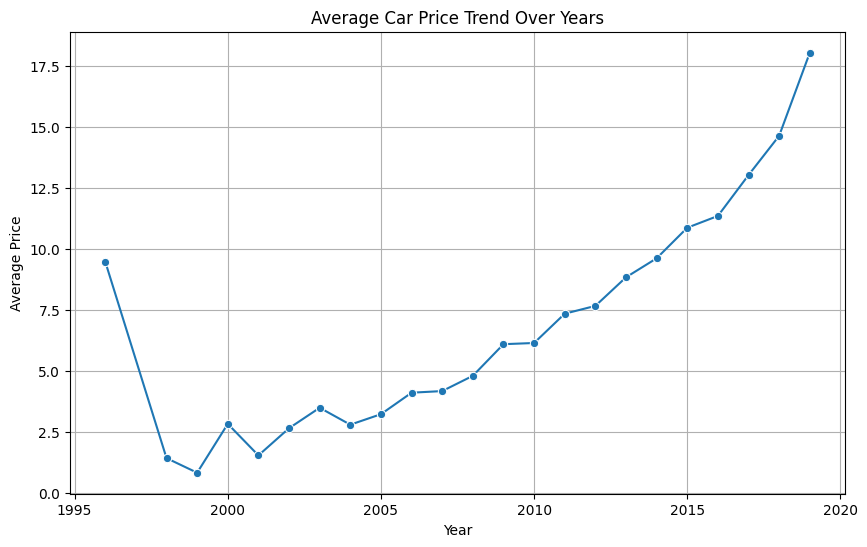

In [38]:
plt.figure(figsize=(10, 6))
average_price_per_year = df.groupby('Year')['Price'].mean().reset_index()
sns.lineplot(data=average_price_per_year, x='Year', y='Price', marker='o')
plt.title('Average Car Price Trend Over Years')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

C:\Users\lokes\AppData\Local\Temp\ipykernel_11628\78769576.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Location', y='Price', palette='coolwarm')


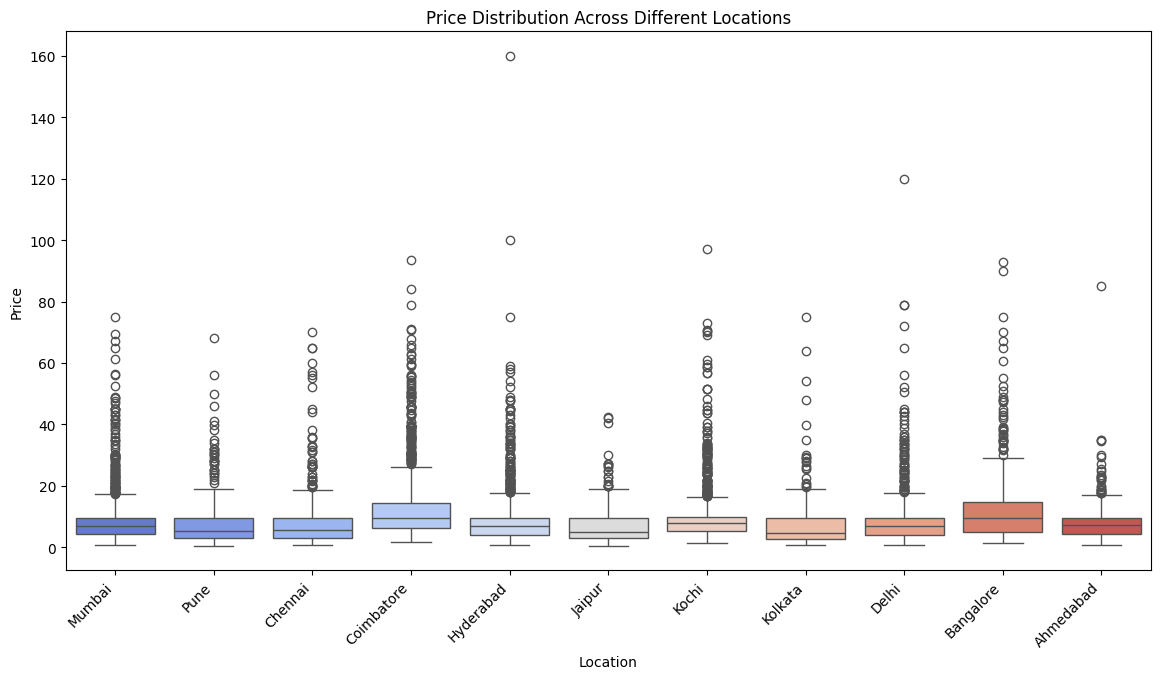

C:\Users\lokes\AppData\Local\Temp\ipykernel_11628\78769576.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Fuel_Type', y='Price', palette='plasma')


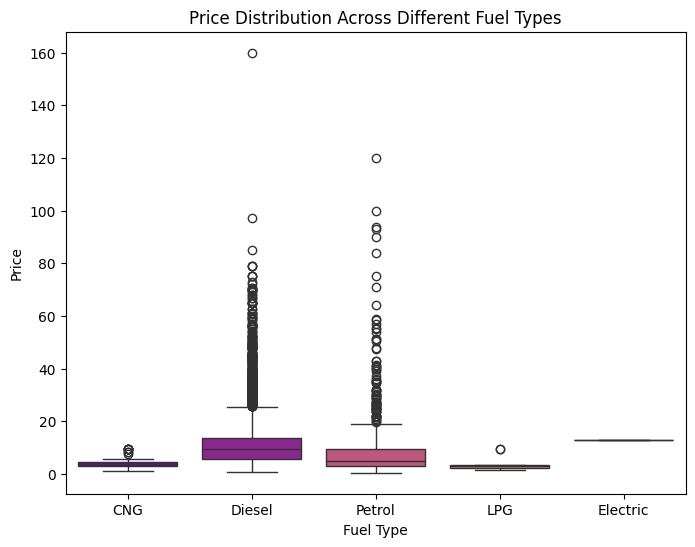

In [39]:
plt.figure(figsize=(14, 7))
sns.boxplot(data=df, x='Location', y='Price', palette='coolwarm')
plt.title('Price Distribution Across Different Locations')
plt.xlabel('Location')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Fuel_Type', y='Price', palette='plasma')
plt.title('Price Distribution Across Different Fuel Types')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.show()

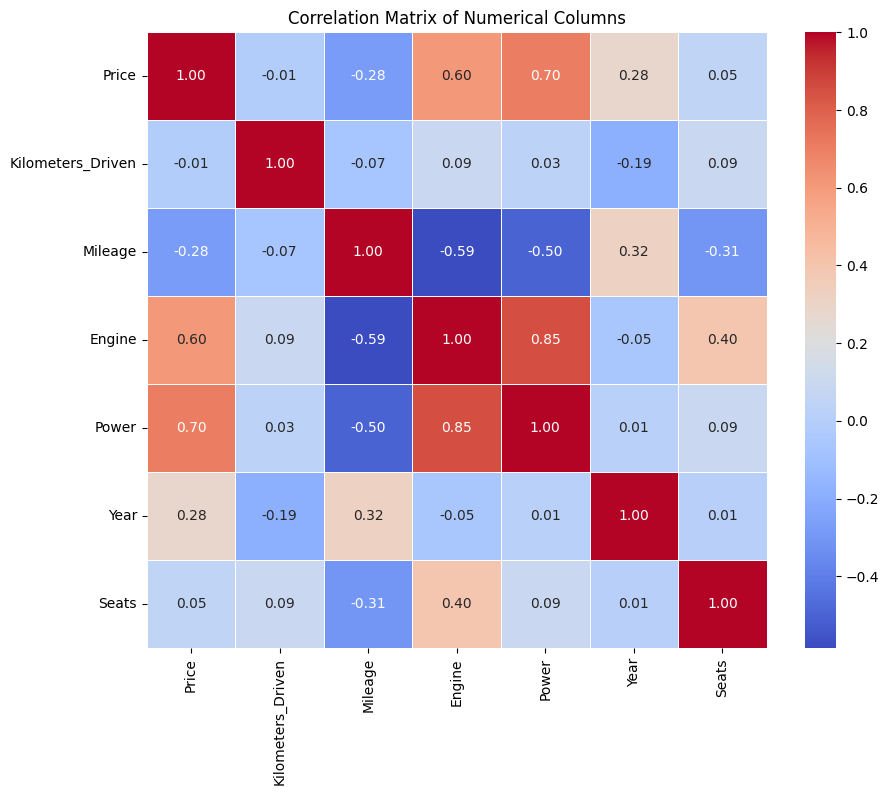

In [40]:
numerical_columns = ['Price', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Year', 'Seats']
df_corr_temp = df[numerical_columns].dropna()
correlation_matrix = df_corr_temp.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Columns')
plt.show()


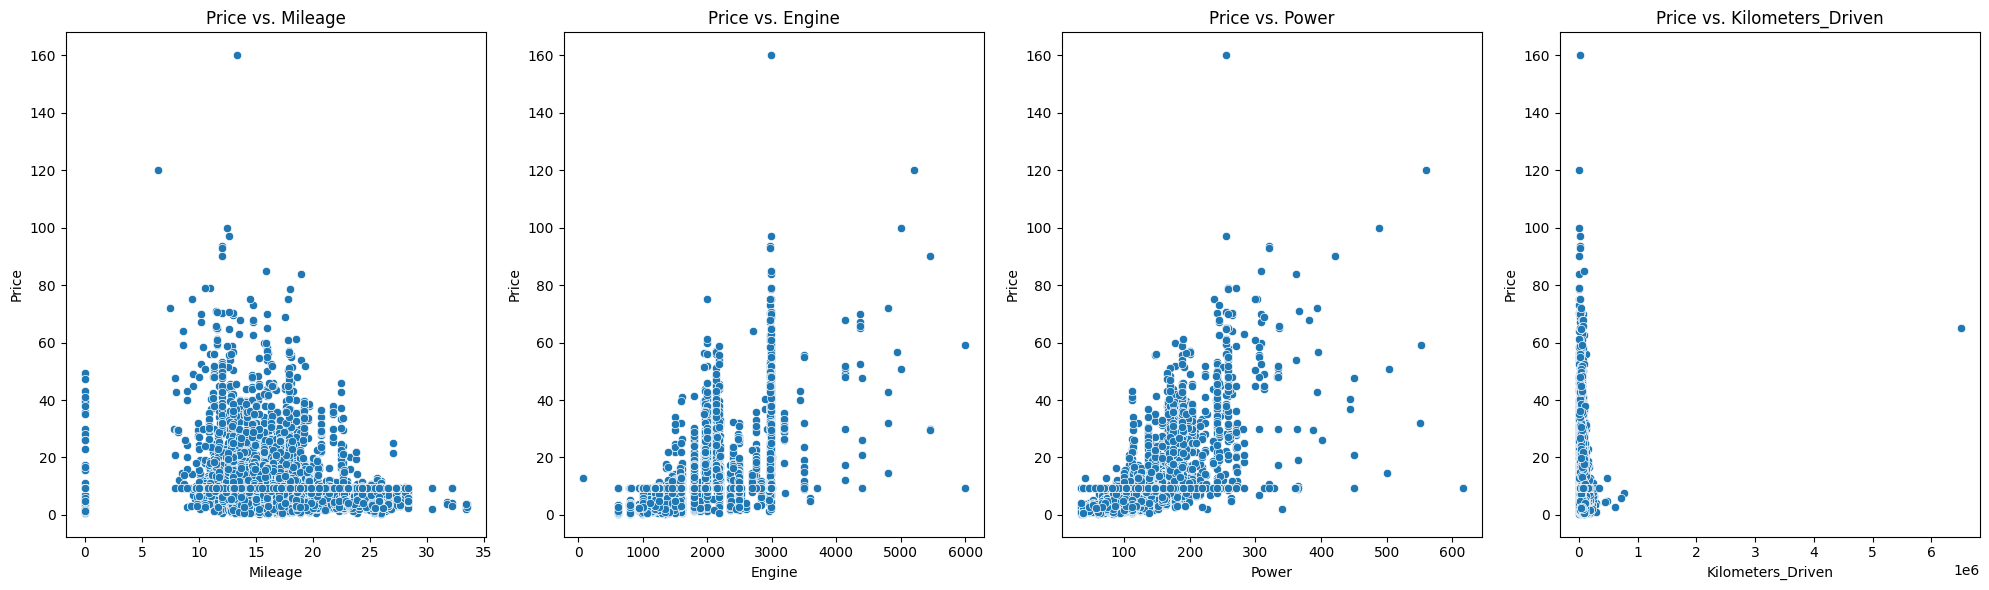

In [41]:
key_numerical_columns = ['Mileage', 'Engine', 'Power', 'Kilometers_Driven']
plt.figure(figsize=(20, 6))
for i, col in enumerate(key_numerical_columns):
    plt.subplot(1, len(key_numerical_columns), i + 1)
    sns.scatterplot(x=col, y='Price', data=df.dropna(subset=[col, 'Price']))
    plt.title(f'Price vs. {col}')
    plt.xlabel(col)
    plt.ylabel('Price')
plt.tight_layout()
plt.show()

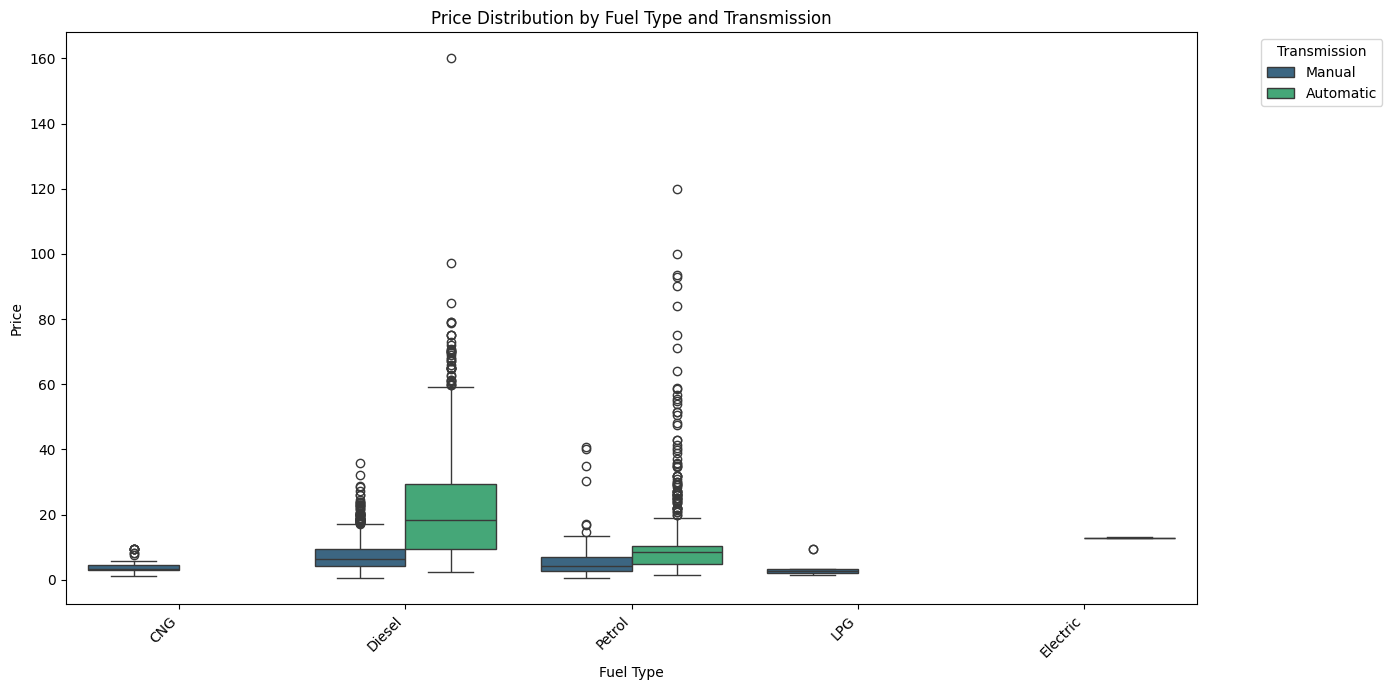

In [42]:
plt.figure(figsize=(14, 7))
sns.boxplot(x='Fuel_Type', y='Price', hue='Transmission', data=df.dropna(subset=['Price', 'Fuel_Type', 'Transmission']), palette='viridis')
plt.title('Price Distribution by Fuel Type and Transmission')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Transmission', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

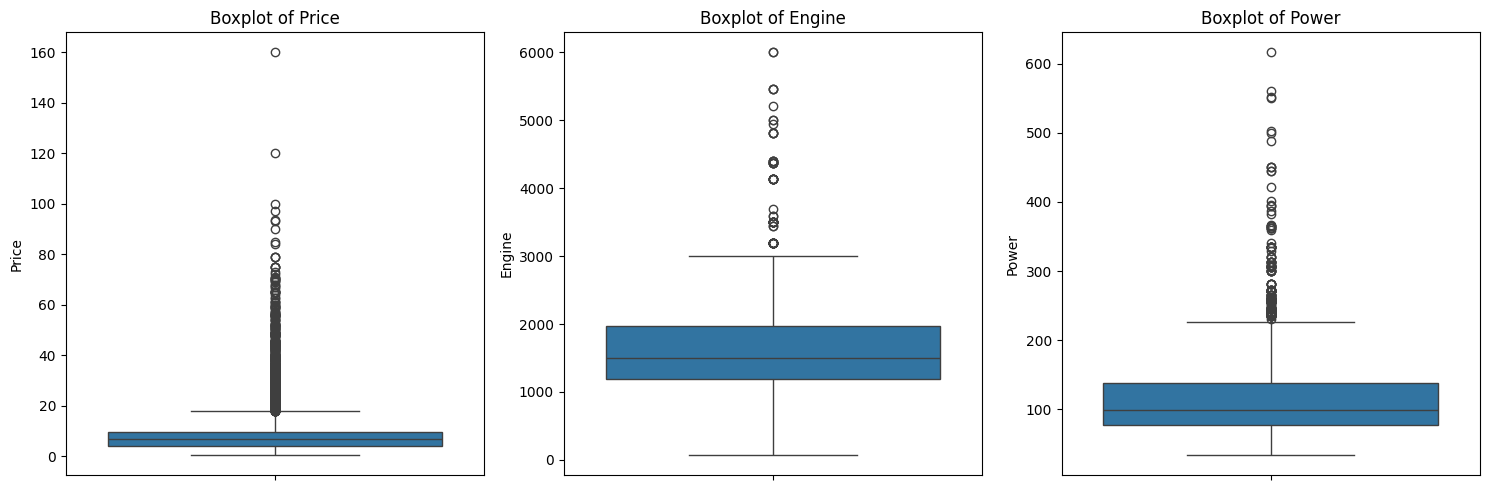

In [43]:
outlier_columns = ['Price', 'Engine', 'Power']
plt.figure(figsize=(15, 5))
for i, col in enumerate(outlier_columns):
    plt.subplot(1, len(outlier_columns), i + 1)
    sns.boxplot(y=df[col].dropna())
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

In [44]:
inconsistency_check_columns = ['Mileage', 'Engine', 'Power']
for col in inconsistency_check_columns:
    print(df[col].isnull().sum())


0
0
0


In [45]:
new_price_missing_count = df['New_Price'].isnull().sum()
new_price_total_rows = len(df)
new_price_missing_percentage = (new_price_missing_count / new_price_total_rows) * 100
print(f"  Total rows: {new_price_total_rows}")
print(f"  Missing values in 'New_Price': {new_price_missing_count}")
print(f"  Percentage of missing values in 'New_Price': {new_price_missing_percentage:.2f}%")


  Total rows: 7253
  Missing values in 'New_Price': 0
  Percentage of missing values in 'New_Price': 0.00%


In [46]:
car_models = df.groupby('Name')[['Price', 'Mileage', 'Engine', 'Power', 'Year', 'Kilometers_Driven']].mean().sort_values(by='Price', ascending=False)
print("\nTop 5 Most Expensive Car Models (Average Price):")
print(car_models.head(5))
print("\nTop 5 Least Expensive Car Models (Average Price):")
print(car_models.head(5))


Top 5 Most Expensive Car Models (Average Price):
                                               Price  Mileage  Engine  Power  \
Name                                                                           
Land Rover Range Rover 3.0 Diesel LWB Vogue  160.000    13.33  2993.0  255.0   
Lamborghini Gallardo Coupe                   120.000     6.40  5204.0  560.0   
Jaguar F Type 5.0 V8 S                       100.000    12.50  5000.0  488.1   
BMW 7 Series 740Li                            93.335    12.05  2979.0  320.0   
Mercedes-Benz SLK-Class 55 AMG                90.000    12.00  5461.0  421.0   

                                               Year  Kilometers_Driven  
Name                                                                    
Land Rover Range Rover 3.0 Diesel LWB Vogue  2017.0            25000.0  
Lamborghini Gallardo Coupe                   2011.0             6500.0  
Jaguar F Type 5.0 V8 S                       2015.0             8000.0  
BMW 7 Series 740Li      

C:\Users\lokes\AppData\Local\Temp\ipykernel_11628\733545492.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=owner_price.index, y=owner_price.values, palette='coolwarm')


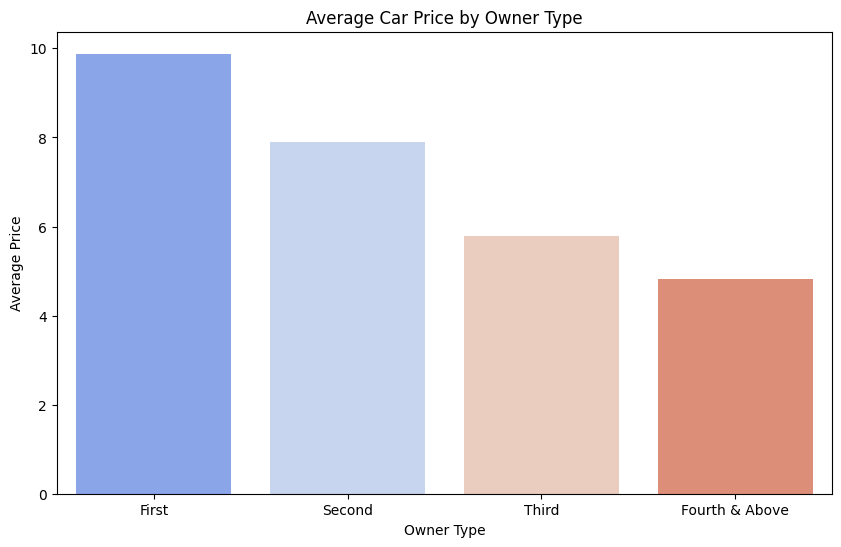

In [47]:
owner_price = df.groupby('Owner_Type')['Price'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=owner_price.index, y=owner_price.values, palette='coolwarm')
plt.title('Average Car Price by Owner Type')
plt.xlabel('Owner Type')
plt.ylabel('Average Price')
plt.show()


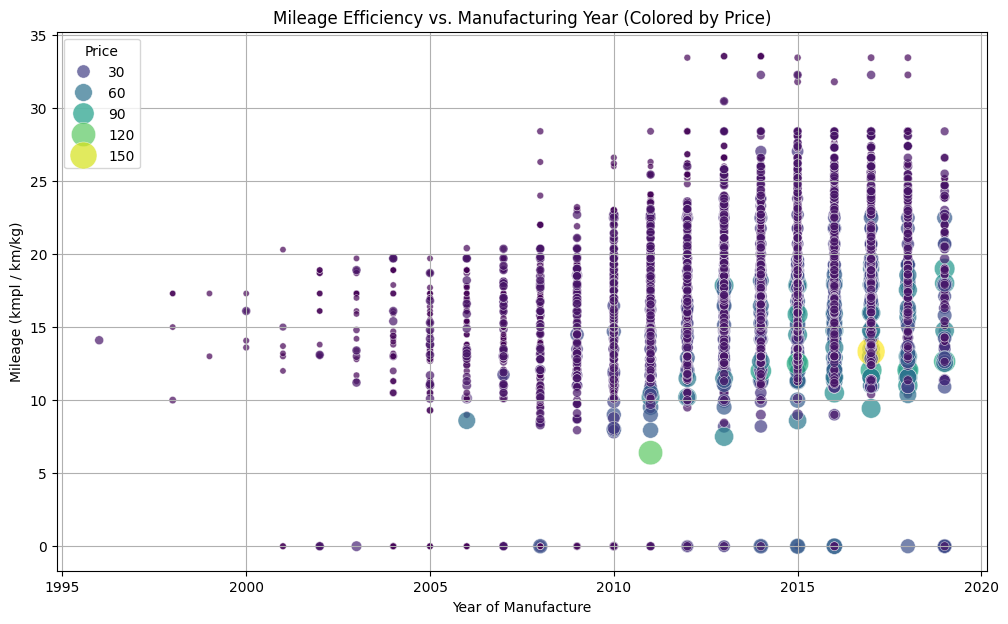

In [48]:
plt.figure(figsize=(12, 7))
sns.scatterplot(x='Year', y='Mileage', hue='Price', data=df, size='Price', sizes=(20, 400), palette='viridis', alpha=0.7)
plt.title('Mileage Efficiency vs. Manufacturing Year (Colored by Price)')
plt.xlabel('Year of Manufacture')
plt.ylabel('Mileage (kmpl / km/kg)')
plt.grid(True)

In [49]:
numerical_columns = ['Price', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Year', 'Seats']
df_corr_temp = df[numerical_columns].dropna()
correlation_matrix = df_corr_temp.corr()
print(correlation_matrix['Price'].sort_values(ascending=False))


Price                1.000000
Power                0.704212
Engine               0.604829
Year                 0.279449
Seats                0.047318
Kilometers_Driven   -0.011318
Mileage             -0.280510
Name: Price, dtype: float64


C:\Users\lokes\AppData\Local\Temp\ipykernel_11628\3524283118.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Owner_Type', y='Price', estimator=np.mean, ci=None)


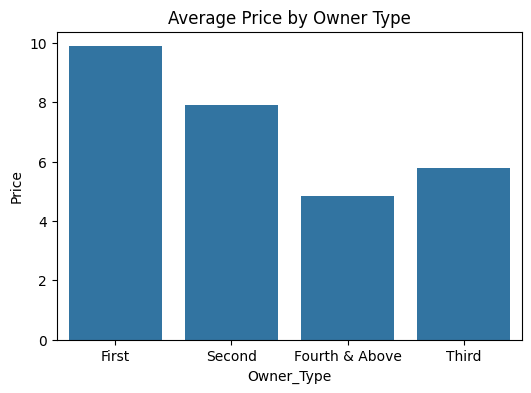

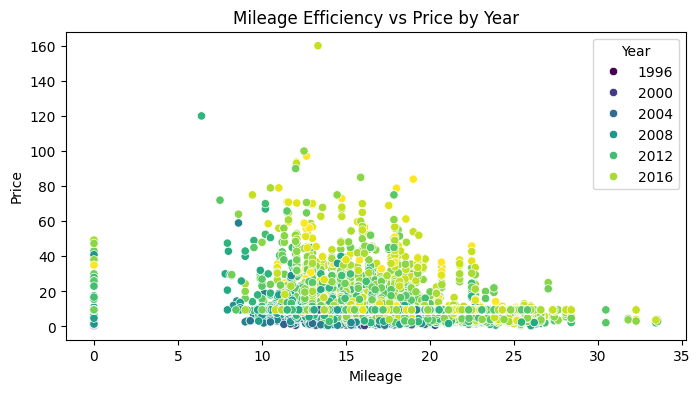

In [50]:
# Average price by Owner_Type
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='Owner_Type', y='Price', estimator=np.mean, ci=None)
plt.title("Average Price by Owner Type")
plt.show()

# Mileage efficiency vs Price and Year
plt.figure(figsize=(8, 4))
sns.scatterplot(data=df, x='Mileage', y='Price', hue='Year', palette='viridis')
plt.title("Mileage Efficiency vs Price by Year")
plt.show()